IMPORT NECESSORY FILES

In [173]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [175]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [177]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [179]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [181]:
len(dataset)

68

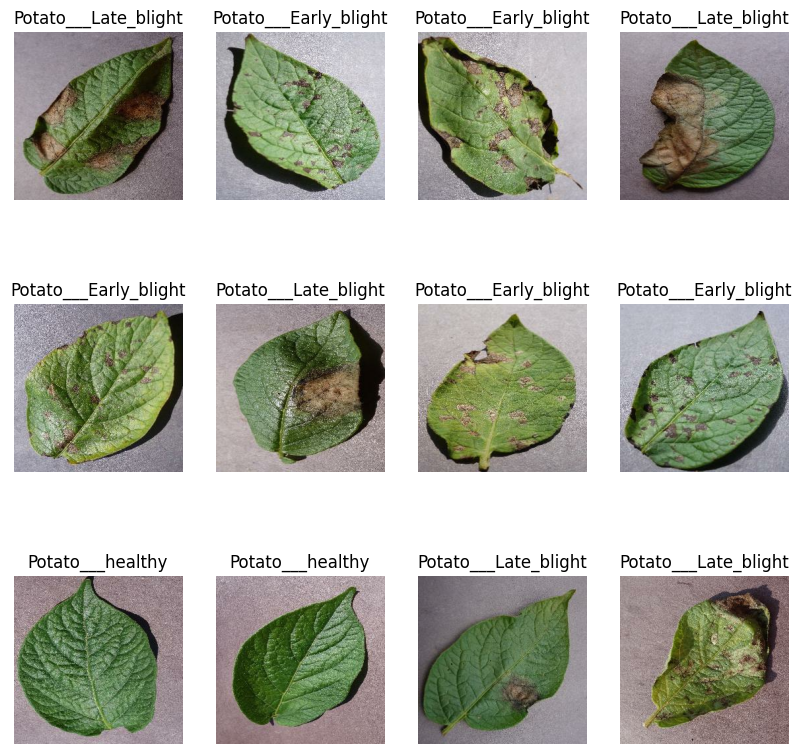

In [183]:
plt.figure(figsize=(10,10)) #increased the dimensions
for image_batch, label_batch in dataset.take(1):
    #print(image_batch.shape) 
    #print(label_batch.numpy())
    #print(image_batch[0].numpy)

    #print the 3D arrey of i images
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)  # Used 3*4 matrix subplot
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert float to int
        plt.title(class_names[label_batch[i]])  # Supply class name as an index
        plt.axis("off")  # Hide axis
   

In [185]:
len(dataset)

68

In [187]:
# 80% ==> training
# 20% ==> 10% validation, 10% test
train_size = 0.8
len(dataset)*train_size #calculate the num of baches for training dataset

54.400000000000006

In [189]:
train_ds = dataset.take(54)# so 1st 54 batches of data set will be our training dataset
len(train_ds)

54

In [191]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [193]:
val_size = 0.1
len(dataset)*val_size #calculate the num of baches for test dataset

6.800000000000001

In [195]:
val_ds = test_ds.take(6)
len(val_ds) # so 1st 6 batches of test data set will be our validation dataset

6

In [197]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [199]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
   
    # Get the total size of the dataset.
    ds_size = len(ds)

    if shuffle:
        # Shuffle the dataset to ensure randomness in the splits.
        ds = ds.shuffle(shuffle_size, seed=12)
    # Calculate the sizes of the training, validation, and test datasets.
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    # Split the dataset into training, validation, and test sets.
    train_ds = ds.take(train_size)  # Take the first 'train_size' samples for training.
    val_ds = ds.skip(train_size).take(val_size)  # Skip the training samples and take 'val_size' samples for validation.
    test_ds = ds.skip(train_size).skip(val_size)  # Skip training and validation samples, use the rest for testing.

    return train_ds, val_ds, test_ds

In [201]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [203]:
len(train_ds)# train size

54

In [205]:
len(val_ds)# validation size

6

In [207]:
len(test_ds)# test size

8

In [209]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  # Cache, shuffle, and prefetch training data  
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  # Cache, shuffle, and prefetch validation data  
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  # Cache, shuffle, and prefetch test data  


In [211]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to fixed size
   tf.keras.layers.Rescaling(1.0/255)  # Normalize pixel values to [0, 1]
])


In [213]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images both horizontally and vertically
    tf.keras.layers.RandomRotation(0.2)  # Randomly rotate images by up to 20%
])



# Build and Train the CNN Model

In [216]:
# Use convolutional neural network to train the model (trial and error approach)
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Define input shape  
n_classes = 3  # Number of output classes  

model = models.Sequential([
    resize_and_rescale,  # Resize and normalize images  
    data_augmentation,  # Apply random augmentations  
   
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),  # First conv layer (trial and error)  
    layers.MaxPooling2D((2,2)),  # First pooling layer  

    layers.Conv2D(64, (3,3), activation='relu'),  # Second conv layer (experimenting)  
    layers.MaxPooling2D((2,2)),  # Second pooling layer  

    layers.Conv2D(64, (3,3), activation='relu'),  # Third conv layer (adjusting depth)  
    layers.MaxPooling2D((2,2)),  # Third pooling layer  

    layers.Conv2D(64, (3,3), activation='relu'),  # Fourth conv layer (testing deeper network)  
    layers.MaxPooling2D((2,2)),  # Fourth pooling layer  

    layers.Conv2D(64, (3,3), activation='relu'),  # Fifth conv layer (fine-tuning)  
    layers.MaxPooling2D((2,2)),  # Fifth pooling layer  

    layers.Conv2D(64, (3,3), activation='relu'),  # Sixth conv layer (trial and error)  
    layers.MaxPooling2D((2,2)),  # Sixth pooling layer  

    layers.Flatten(),  # Flatten feature maps  
    layers.Dense(64, activation='relu'),  # Fully connected layer (experimenting with 64 neurons)  
    layers.Dense(n_classes, activation='softmax'),  # Output layer with softmax activation  
])

model.build(input_shape=input_shape)  # Build model based on input shape  


In [218]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [220]:
# Compile the model with the following configurations:
model.compile(
    # Optimizer used for training the model; 'adam' adapts the learning rate during training
    optimizer='adam',  
    
    # Loss function used to measure the error during training; SparseCategoricalCrossentropy is used for multi-class classification problems with integer labels.
    # The 'from_logits=False' parameter indicates that the output layer's activation function (like softmax) is already applied.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    
    # Metrics used to evaluate the model's performance; 'accuracy' measures the proportion of correct predictions.
    metrics=['accuracy']
)


In [222]:
history = model.fit(
    train_ds,              # The training data (features and labels)
    epochs=EPOCHS,         # Number of times to loop through the whole training data
    batch_size=BATCH_SIZE, # Number of samples in each group (batch) during training
    verbose=1,             # Show progress during training
    validation_data=val_ds # Data used to check the model's performance after each training cycle
)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 493ms/step - accuracy: 0.4917 - loss: 0.9409 - val_accuracy: 0.5781 - val_loss: 0.8467
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 484ms/step - accuracy: 0.5959 - loss: 0.8719 - val_accuracy: 0.7552 - val_loss: 0.5665
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 495ms/step - accuracy: 0.7594 - loss: 0.5768 - val_accuracy: 0.7344 - val_loss: 0.5880
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 484ms/step - accuracy: 0.7787 - loss: 0.4986 - val_accuracy: 0.8281 - val_loss: 0.4060
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 477ms/step - accuracy: 0.8659 - loss: 0.3584 - val_accuracy: 0.8958 - val_loss: 0.2936
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 474ms/step - accuracy: 0.8651 - loss: 0.3386 - val_accuracy: 0.9375 - val_loss: 0.1694
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 474ms/step - accuracy: 0.9018 - loss: 0.2470 - val_accuracy: 0.9375 - val_loss: 0.1896
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 477ms/step - accuracy: 0.9260 - loss: 0.2322 - val_accu

In [224]:
scores = model.evaluate(test_ds)  #Evaluate the model's performance using the test data


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 1.0000 - loss: 0.0108


In [226]:
scores

[0.012302413582801819, 1.0]

In [228]:
history

In [230]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [232]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [234]:
acc = history.history['accuracy']         # Get the accuracy values from the training process
val_acc = history.history['val_accuracy'] # Get the validation accuracy values from the training process

loss = history.history['loss']            # Get the loss values from the training process
val_loss = history.history['val_loss']    # Get the validation loss values from the training process


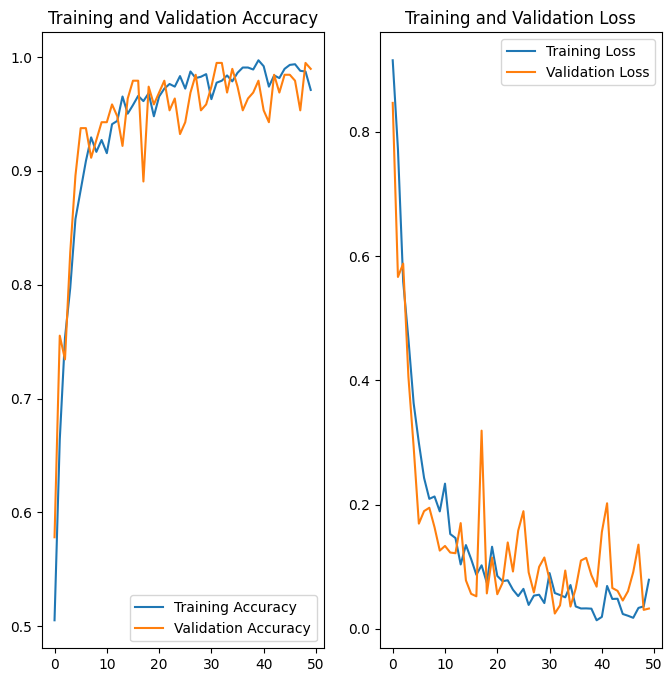

In [236]:
plt.figure(figsize=(8,8))  # Create a figure with a size of 8x8 inches

plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns, this is the first subplot)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')  # Plot the training accuracy vs. epoch
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')  # Plot the validation accuracy vs. epoch
plt.legend(loc='lower right')  # Add a legend in the lower right corner
plt.title('Training and Validation Accuracy')  # Set the title for this subplot

plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, this is the second subplot)
plt.plot(range(EPOCHS), loss, label='Training Loss')  # Plot the training loss vs. epoch
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')  # Plot the validation loss vs. epoch
plt.legend(loc='upper right')  # Add a legend in the upper right corner
plt.title('Training and Validation Loss')  # Set the title for this subplot

plt.show()  # Show the plots


In [238]:
np.argmax([9.9999964e-01, 3.9333537e-07, 1.1586251e-18]) # Find the index of the largest value.Output: 0 (since the largest value is at index 0)

0

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
predicted label: Potato___Early_blight


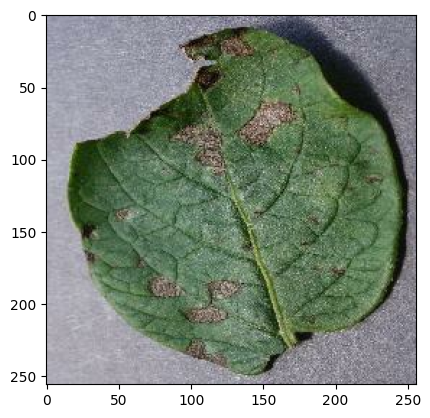

In [240]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):  # Loop through the first batch in the test dataset
    
    first_image = images_batch[0].numpy().astype('uint8')  # Convert the first image to uint8 format for displaying
    first_label = labels_batch[0].numpy()  # Get the label of the first image

    print("first image to predict")  # Indicate the first image to be predicted
    plt.imshow(first_image)  # Display the first image
    print("actual label:", class_names[first_label])  # Print the actual label of the first image

    batch_prediction = model.predict(images_batch)  # Get predictions for the entire batch of images
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])  # Print the predicted label for the first image


In [242]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())  # Convert the image to a numpy array
    img_array = tf.expand_dims(img_array, 0)  # Create a batch by adding an extra dimension (batch size of 1)

    predictions = model.predict(img_array)  # Get predictions for the image batch

    predicted_class = class_names[np.argmax(predictions[0])]  # Get the class name with the highest predicted probability
    confidence = round(100 * (np.max(predictions[0])), 2)  # Calculate the confidence (probability) of the prediction and round it to 2 decimal places
    
    return predicted_class, confidence  # Return the predicted class and its confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


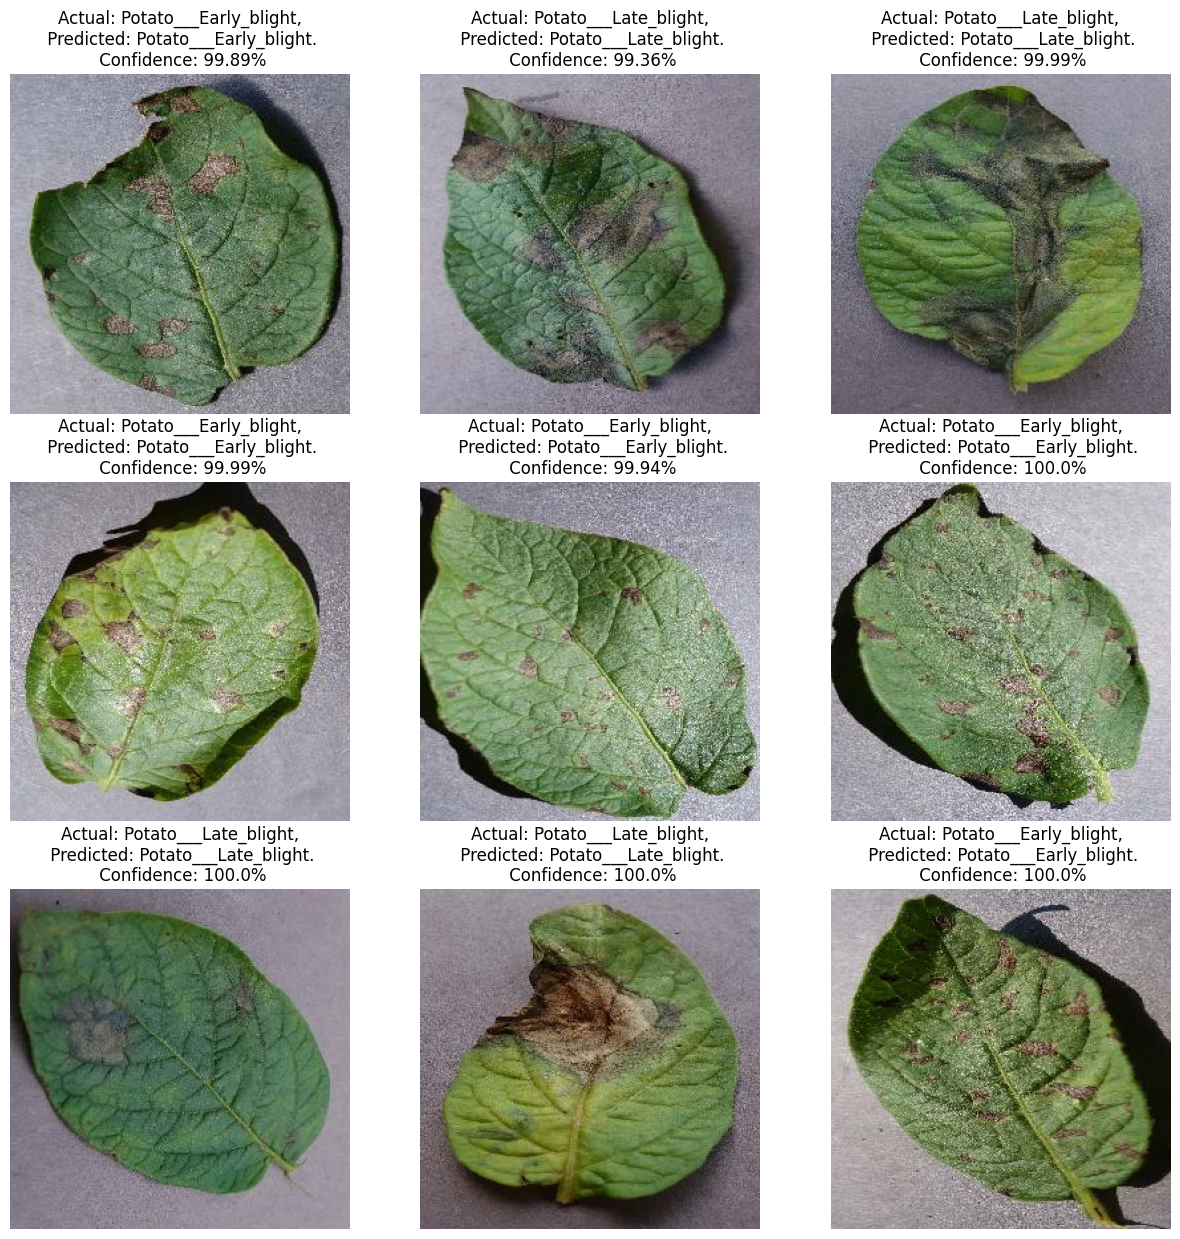

In [244]:
plt.figure(figsize=(15, 15))  # Set up the figure with a size of 15x15 inches
for images, labels in test_ds.take(1):  # Loop through the first batch of images and labels in the test dataset
    for i in range(9):  # Loop through the first 9 images in the batch
        ax = plt.subplot(3, 3, i + 1)  # Create a 3x3 grid for displaying images
        plt.imshow(images[i].numpy().astype("uint8"))  # Display the i-th image in the grid

        predicted_class, confidence = predict(model, images[i].numpy())  # Get the predicted class and confidence for the image
        actual_class = class_names[labels[i]]  # Get the actual class name from the labels

        # Set the title with actual and predicted class names, along with the confidence score
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")  # Turn off the axis for a cleaner display


In [248]:
#import os  

#model_version = max([int(i) for i in os.listdir("../saved_models")] + [0]) + 1  # Get the next model version number  
#model.export(f"../saved_models/{model_version}")  # Export the model to the new versioned directory  
#tf.keras.models.save_model(model,f"../saved_models/{model_version}.keras")
import os
import tensorflow as tf  # ensure TensorFlow is imported

# Gather numeric version numbers from files in the saved_models directory
versions = []
for filename in os.listdir("../saved_models"):
    base, ext = os.path.splitext(filename)
    if base.isdigit():
        versions.append(int(base))

# Determine the next version number
model_version = max(versions, default=0) + 1

# Save the model with the new version number, e.g., "2.keras"
tf.keras.models.save_model(model, f"../saved_models/{model_version}.keras")
